In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [29]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)


# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

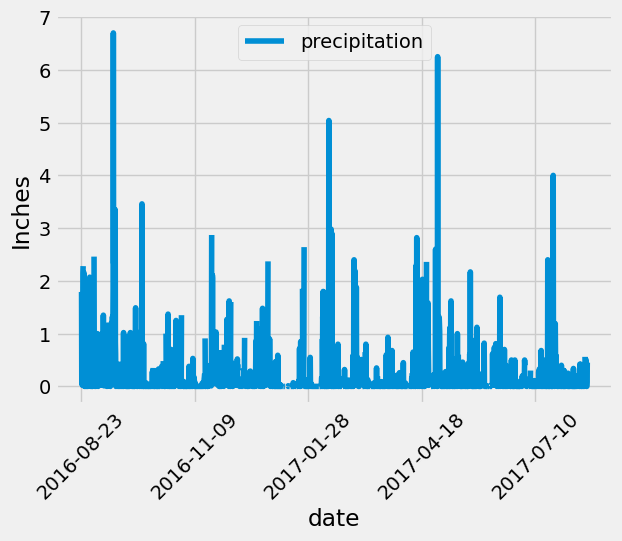

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date
# Calculate the date one year from the last date in data set.
year_from_recent = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
precip_date_year_from_recent = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_from_recent).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precip_date_year_from_recent = pd.DataFrame(precip_date_year_from_recent, columns=['date', 'precipitation'])
df_precip_date_year_from_recent.set_index(df_precip_date_year_from_recent['date'], inplace=True)

# Sort the dataframe by date
df_precip_date_year_from_recent = df_precip_date_year_from_recent.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df_precip_date_year_from_recent.plot(rot=45)
plt.ylabel('Inches')

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_precip_date_year_from_recent.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()


[(9,)]

In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()

print(most_active_station)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_actice_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(f'{most_actice_stats}')

[(54.0, 85.0, 71.66378066378067)]


Text(0.5, 0, 'Temperature')

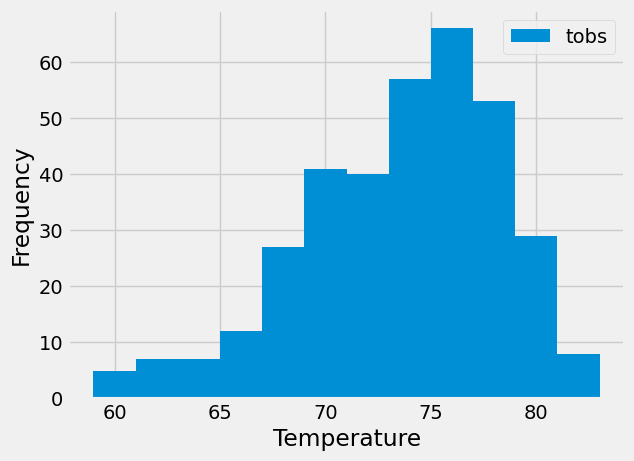

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_year = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_from_recent).all()

plot = pd.DataFrame(most_active_year, columns=['tobs'])  
plot.plot.hist(bins=12)  
plt.xlabel('Temperature')


# Close Session

In [39]:
# Close Session
session.close()